# Q.1 Linear Regression — Predicting House Prices

In [48]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


<h2>1.1 Pre-Processing the Data</h2>

In [49]:
df = pd.read_csv('/home/priyanshu/Downloads/train.csv')
df_train = df.iloc[:1168 , :]
df_test = df.iloc[1168:,:]
train_input = df_train['OverallQual'].values
train_output = df_train['SalePrice'].values
train_input = df_test['OverallQual'].values
train_output = df_test['SalePrice'].values

In [50]:
print(df_train['OverallQual'].isnull().sum())
print(df_train['SalePrice'].isnull().sum())

0
0


<h2>1.2 Training Linear Regression from Scratch</h2>

w =  45348.33431701521
b =  -93979.61121400689


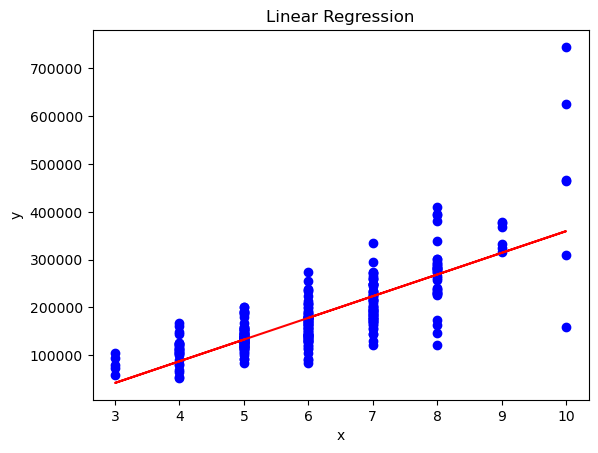

In [51]:
def forward_propagation(train_input, w, b):
    z = np.dot(train_input, w) + b
    return z
def cost_function(z, train_output):
    m = train_output.shape[0]
    cost = np.sum((z - train_output) ** 2) / (2 * m)
    return cost
def backward_propagation(train_input, z, train_output):
    m = train_output.shape[0]
    dz = z - train_output
    dw = np.dot(train_input.T, dz) / m
    db = np.sum(dz) / m
    return dw, db
def update_parameters(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b
def train(train_input, train_output, learning_rate, num_iterations):
    w = 0
    b = 0
    costs = []
    for i in range(num_iterations):
        z = forward_propagation(train_input, w, b)
        cost = cost_function(z, train_output)
        dw, db = backward_propagation(train_input, z, train_output)
        w, b = update_parameters(w, b, dw, db, learning_rate)
        costs.append(cost)
    return w, b, costs
w, b, costs = train(train_input, train_output, learning_rate=0.03, num_iterations=3000)
print("w = ", w)
print("b = ", b)
plt.scatter(train_input, train_output, color='blue')
plt.plot(train_input, w*train_input + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

<h2>1.3 Testing the Custom Model</h2>

In [52]:
n=len(train_input)
y_predictions = [w*xi+b for xi in train_input]
mse_predictions = sum((y_predictions[i] - train_output[i])**2 for i in range(n))/n
print(f"The mean square error for the custom model is : {mse_predictions}")

The mean square error for the custom model is : 2626049318.0259676


<h2>1.4 Training and testing Sklearn’s Linear Regression Model</h2>

In [53]:
x_reshape = train_input.reshape(-1,1)
y_reshape = train_output.reshape(-1,1)
x_test_reshape = train_input.reshape(-1,1)
y_test_reshape = train_output.reshape(-1,1)
model = LinearRegression()
model.fit(x_reshape , y_reshape)

LinearRegression()

In [54]:
y_pred = model.predict(x_test_reshape)
mse = mean_squared_error(y_test_reshape , y_pred)
print(f"The mean square error for the Sklearn's model is : {mse}")

The mean square error for the Sklearn's model is : 2625977511.0834246


<h2>1.5 Creating the Required Plots</h2>

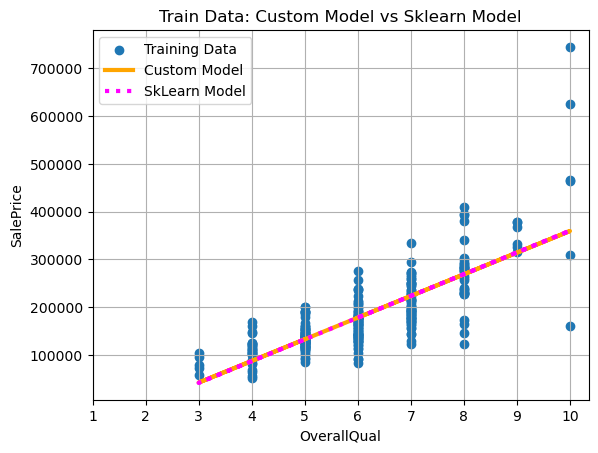

In [55]:
plt.scatter(train_input,train_output, label='Training Data')
plt.plot(train_input,w*train_input+b , color = 'Orange' , linewidth = 3, label = 'Custom Model')
plt.plot(train_input, model.predict(x_reshape), color = 'Magenta' , linewidth =3 ,linestyle = 'dotted' ,label='SkLearn Model')
plt.title('Train Data: Custom Model vs Sklearn Model')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(True)
plt.show()

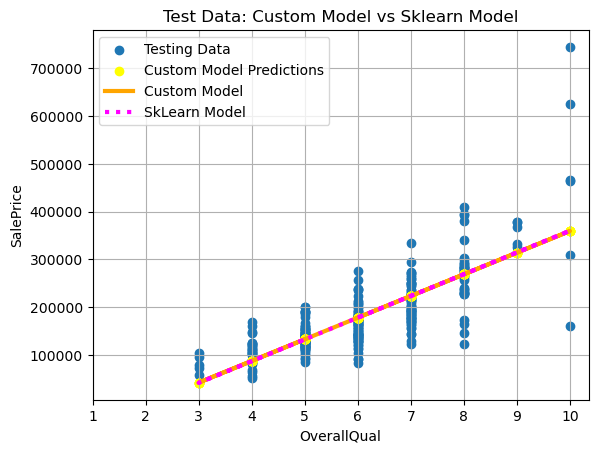

In [58]:
plt.scatter(test_input,test_output, label='Testing Data')
plt.scatter(test_input, y_predictions, color ='yellow', label = 'Custom Model Predictions')
plt.plot(test_input,w*test_input+b , color = 'Orange' , linewidth = 3, label = 'Custom Model')
plt.plot(test_input, model.predict(x_test_reshape), color = 'Magenta' , linewidth =3 ,linestyle = 'dotted' ,label='SkLearn Model')
plt.title('Test Data: Custom Model vs Sklearn Model')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(True)
plt.show()

# Question 2 : Logistic Regression — Predicting Student Pass/Fail Outcome

In [73]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

<h2>2.1 Preprocess the Data</h2>

In [74]:
data = pd.read_csv('/home/priyanshu/SignVision/Assignments/Assignment_2/StudentsPerformance.csv')

# Create binary target: 1 if math score >= 50, else 0
data['PassedMath'] = (data['math score'] >= 50).astype(int)

# Use "reading score" as feature
X = data[['reading score']].values
y = data['PassedMath'].values

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

<h2>2.2 Train Logistic Regression from Scratch</h2>

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Initialize weights
bias = -12  # You may tune this based on the scale
weight = 0.4

# Gradient descent
for i in range(iterations):
    z = bias + X_train[:, 0] * weight
    predictions = sigmoid(z)
    errors = predictions - y_train

    grad_bias = np.mean(errors)
    grad_weight = np.mean(errors * X_train[:, 0])

    bias -= learning_rate * grad_bias
    weight -= learning_rate * grad_weight

print("Learned bias:", bias)
print("Learned weight (reading score):", weight)



Learned bias: -11.967420479938639
Learned weight (reading score): 0.2347393981160962
Custom Model Accuracy: 0.87
Custom Confusion Matrix:
 [[ 15  19]
 [  7 159]]


<h2>2.3 Test Your Custom Model</h2>

In [79]:
# Predict on test set
z_test = bias + X_test[:, 0] * weight
predicted_probs = sigmoid(z_test)
y_pred_custom = (predicted_probs >= 0.5).astype(int)

# Evaluate custom model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
cm_custom = confusion_matrix(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

print("Custom Model Accuracy:", accuracy_custom)
print("Custom Confusion Matrix:\n", cm_custom)

Custom Model Accuracy: 0.87
Custom Confusion Matrix:
 [[ 15  19]
 [  7 159]]


<h2>2.4 Train and Test Sklearn’s LogisticRegression Model</h2>

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Sklearn Logistic Regression Accuracy:", accuracy_sklearn)
print("Sklearn Confusion Matrix:\n", cm_sklearn)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Custom Model
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'], ax=axes[0])
axes[0].set_title("Custom Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Sklearn Model
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'], ax=axes[1])
axes[1].set_title("Sklearn Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Sklearn Logistic Regression Accuracy: 0.865
Sklearn Confusion Matrix:
 [[ 14  20]
 [  7 159]]


<h2>2.5 Additional Model Evaluation</h2>

In [78]:
print("\n--- Model Comparison on Test Set ---")
print(f"{'Metric':<10} | {'Custom Model':<15} | {'Sklearn Model':<15}")
print("-" * 46)
print(f"{'Accuracy':<10} | {accuracy_custom:<15.4f} | {accuracy_sklearn:<15.4f}")
print(f"{'Precision':<10} | {precision_custom:<15.4f} | {precision_sklearn:<15.4f}")
print(f"{'Recall':<10} | {recall_custom:<15.4f} | {recall_sklearn:<15.4f}")
print(f"{'F1-score':<10} | {f1_custom:<15.4f} | {f1_sklearn:<15.4f}")



--- Model Comparison on Test Set ---
Metric     | Custom Model    | Sklearn Model  
----------------------------------------------
Accuracy   | 0.8700          | 0.8650         
Precision  | 0.8933          | 0.8883         
Recall     | 0.9578          | 0.9578         
F1-score   | 0.9244          | 0.9217         
